In [55]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from collections import Counter
import pygraphviz as pgv
from pyvis.network import Network
from matplotlib.pyplot import figure
from IPython.display import display

In [ ]:
years = range(1990,2022)
for y in years:
    locals()['Gorg' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\orgorg4\orgorg4_single' +
                                               str(y) +
                                               '.gpickle')
    print(y)

In [ ]:
years = range(1994,2021)
for y in years:
    locals()['Gbid' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\bidbid_stage_self_single\bidbid_stage_self_single_' +
                                               str(y) +
                                               '.gpickle')
    print(y)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hypergeom_pmf(N, A, n, x):
    
    '''
    Probability Mass Function for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param x: number of desired items in our draw of n items
    :returns: PMF computed at x
    '''
    Achoosex = comb(A,x)
    NAchoosenx = comb(N-A, n-x)
    Nchoosen = comb(N,n)
    
    return (Achoosex)*NAchoosenx/Nchoosen

In [ ]:
def hypergeom_cdf(N, A, n, t, min_value=None):
    
    '''
    Cumulative Density Funtion for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param t: number of desired items in our draw of n items up to t
    :returns: CDF computed up to t
    '''
    if min_value:
        return np.sum([hypergeom_pmf(N, A, n, x) for x in range(min_value, t+1)])
    
    return np.sum([hypergeom_pmf(N, A, n, x) for x in range(t+1)])

In [ ]:
def plot_degree_dist(G):
    hist = nx.degree_histogram(G)
    q = [w+1 for w in hist]
    q = np.log(q[1:])
    
    plt.subplot(7,3, y-2000)
    x = np.log(range(1, len(hist)))
    plt.plot(x, q, ".")
    plt.title(str(y))
    
    #plt.loglog()
    m, b = np.polyfit(x, q, 1)
    plt.plot(x, m*x + b)
    #print(y)
    #print(m)
    #print(' ')

In [ ]:
def get_succ(status):
    if status == 'Acquired':
        return 1
    if status == 'Alive / Active':
        return 0
    if status == 'IPO / Went public':
        return 1
    if status == 'Merged':
        return 1
    else:
        return 0
    
    


In [ ]:
f, axs = plt.subplots(7,3,figsize=(15,15), sharex=True, sharey=True)

for y in range(2001,2022):
    plot_degree_dist(locals()['Gorg' + str(y)])
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
plt.show()

In [ ]:
orgs.columns

### Most important

In [ ]:
bidders = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariate_bidbid_final_final2.csv') # <-- relative path
orgs = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariates_orgorg_final2.csv') # <-- relative path


In [ ]:
nodes = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\nodes.csv') # <-- relative path
covariates = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\covariates.csv')

In [ ]:
bidders = pd.merge(bidders, nodes, on = 'id')
orgs = pd.merge(orgs,nodes, on = 'id')

In [ ]:
orgs2 = pd.merge(orgs, covariates, on = 'id')

In [ ]:
covariates.columns

In [ ]:
bonav = covariates[covariates.date < covariates.foundation +3]

In [ ]:
outcome = list(set(bonav['current_sit']))
success = [0,0,1,1,0,1]

bonav2 = pd.merge(bonav, df_s, on = 'current_sit')
bonav3 = pd.merge(bonav2, df_st8, on = 'id')

st8 = []
for i in tqdm(range(0,len(bonav3))):
    st8.append(get_succ(bonav3.iloc[i,:]['st8']))

In [ ]:
for y in range(1995,2022):
    print(y, " ", len(bonav[bonav.foundation == y]))

In [ ]:
df_s = pd.DataFrame({'current_sit': outcome, 'success' : success})

In [ ]:
bonav3['succ8'] = st8

In [ ]:
centralities = bonav.columns[13:]
i = -1
cent = centralities[i]
print(cent)

In [ ]:
b12 = bonav3[bonav3['foundation']<2013]
#b12 = b12[b12['first_money']<10000000]
b12 = b12[[cent, 'current_sit','success','stage', 'st8', 'succ8','first_money','id', 'node','st8']]
b12 = b12[b12[cent].notnull()]

In [ ]:
moves = []
p = []
N = len(b12)
A = sum(b12['succ8'])

for i in range(20,250):
    t = sum(b12.sort_values(ascending=True, by = cent)[0:i]['succ8'])
    moves.append(t/i)
    n = i
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))

In [ ]:
moves = []
p = []
lung = 250
for i in range(20,lung):
    t = sum(b12.sort_values(ascending=False, by = cent)[0:i]['succ8'])
    moves.append(t/i)
    n = i
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))

In [ ]:
centralities = [bonav.columns[i] for i in [8] + list(range(13,len(bonav.columns)))]
for i in centralities:
    cent = i
    print(cent)
    b12 = bonav3[bonav3['foundation']<2013]
    #b12 = b12[b12['first_money']<10000000]
    b12 = b12[[cent, 'current_sit','success','stage', 'st8', 'succ8','id', 'node','st8']]
    b12 = b12[b12[cent].notnull()]
    moves = []
    p = []
    N = len(b12)
    A = sum(b12['succ8'])

    for i in range(20,250):
        t = sum(b12.sort_values(ascending=False, by = cent)[0:i]['succ8'])
        moves.append(t/i)
        n = i
        p.append(hypergeom_cdf(N, A, n, t, min_value=None))
    plt.scatter(range(20,lung), p)
    plt.show()

In [ ]:
sum(b12['succ8'])/len(b12)

In [ ]:
len(b12[(b12.first_money>10^6) & (b12.first_money<10^8)])

In [ ]:
for y in range(1995,2021):
    display(orgs[['closeness_centrality' + str(y), 'node', 'country', 'industry']].sort_values(ascending=False, 
                                                                                            by = 'closeness_centrality' + str(y)).iloc[0:30,:])

In [ ]:
b12.sort_values(ascending=False, by = 'closeness_centrality_org')[0:1000]

In [ ]:

sns.set(style='ticks')
_success= [0, 1]
df = pd.DataFrame({
    'centr': (b12[cent]),
    'money': np.log(b12['first_money']),
    'success': b12['succ8']
})

In [ ]:
sns.relplot(data=df, x='eigen', y='money', hue='success', hue_order=_success, aspect=1.61)
plt.show()

In [ ]:
for i in centralities:
    sns.boxplot(x = "succ8", y = i, data = b12)
    plt.show()

In [ ]:
A = nx.nx_agraph.to_agraph(Gorg2005)
H = nx.nx_agraph.from_agraph(A)

# Definizione Classica

In [ ]:
cb1 = pd.read_csv('cb1.csv')
cb2 = pd.read_csv('cb2.csv')
cb3 = pd.read_csv('cb3.csv')
cb = cb1.append(cb2)
cb = cb.append(cb3)
cb.index = range(len(cb))
cb['date_my'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('m')
cb['date_y'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('y')

nodes_org = cb[['target_name', 'target_ID', 'target_country', 'target_continent', 'industry', 'target_founded']].drop_duplicates()
nodes_org['bipartite'] = 1
nodes_inv = cb[['investors_name', 'investor_id', 'investor_country', 'investor_continent', 'industry', 'investor_founded']].drop_duplicates()
nodes_org = nodes_org.rename(columns={"target_name": "node", "target_country": "country", 
                                      "target_continent": "continent", "industry":"industry",
                                     "target_ID":"index", 'target_founded':'foundation'})
nodes_inv = nodes_inv.rename(columns={"investors_name": "node","investor_country": "country", 
                                      "investor_continent": "continent", "investor_type":"industry","investor_id":'index', 'investor_founded':'foundation' })
nodes_inv['bipartite'] = 0
nodes = nodes_org.append(nodes_inv, ignore_index= True)
nodes['id'] = nodes.index

numbers = cb.groupby(['target_name','stage'], as_index = False).count()[['target_name','stage','investors_name']].rename(columns={"investors_name": "investor_numbers"})
cb_new = pd.merge(cb, numbers,  how='left', left_on=['target_name','stage'], right_on = ['target_name','stage'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 1],  how='left', left_on=['target_name','target_ID'], right_on = ['node','index'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 0],  how='left', left_on=['investors_name','investor_id'], right_on = ['node','index'])


In [ ]:
def get_status(rounds):
    a = list()
    for i in rounds:
        indice = stage.index(i)
        a.append(stato[indice])
    return a
    
    


In [ ]:
get_status(['Dead'])

In [ ]:
Counter(stati_8)

In [ ]:
stati = cb_new.groupby('id_x')
stati2 = stati.tail(1).reset_index(drop=True)
stati3 = stati2[stati2["date"].notna()]

stati2[stati2["target_status"] == "Merged"].drop_duplicates()[["target_name","round_simp","target_status", "date"]]
fun_status = stati2[["round_simp", "target_status"]].groupby(['round_simp', "target_status"]).size().unstack(fill_value=0)[1:61]
fun_status.T.index.values

fun_status.mode()['Dead / Inactive']
stage = list(fun_status.idxmax(axis=1).index)
stage.append("Acq - P2P")

stato = list(fun_status.idxmax(axis=1))
stato.append("Acquired")

set(stato)
#robustness nel passare degli anni

In [ ]:
df = cb_new
df['date_y']=df['date_y']
df = df[df['date_y']>0]
df = df[df['target_founded']>0]
ids = set(df['id_x'])

company = []
status_8 = []
for i in tqdm(ids):
    sub = df[df['id_x']== i][['id_x', 'date_y', 'round_simp','target_founded']]
    sub = sub[(sub['date_y']<=sub['target_founded'].values[0]+8) & (sub['target_founded'].values[0] < 2013)].tail(1)
    company.append(i)
    roun = sub['round_simp']
    status_8.append(get_status(roun))
    if i % 10000 == 0:
        print(i)
    
    
    
    

In [ ]:
stati_8 = [x[0] if len(x) >= 1 else 2 for x in status_8]

In [ ]:
df_st8 = pd.DataFrame({'id' : company, 'st8' : stati_8})

In [ ]:
len(stati_8)

In [ ]:
df_st8['st8'][150:180]

## Networkss

In [ ]:
for i in tqdm(range(1994,2021)):
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.node, index=nodes.id).to_dict(), 'name')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.country, index=nodes.id).to_dict(), 'country')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.continent, index=nodes.continent).to_dict(), 'continent')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.industry, index=nodes.id).to_dict(), 'industry')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.foundation, index=nodes.id).to_dict(), 'foundation')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.bipartite, index=nodes.id).to_dict(), 'bipartite')
    print(i)

In [ ]:
Gbid2015.edges(data = True)

### countries

In [42]:
edges = nx.to_pandas_edgelist(Gbid2003)
nodes

In [46]:
prova = pd.merge(edges, nodes[['country','continent','id']], how = 'left', left_on = 'source', right_on = 'id' )

In [49]:
prova2 =pd.merge(prova, nodes[['country','continent','id']], how = 'left', left_on = 'target', right_on = 'id' )

In [110]:
weight = []
sub = prova2[['country_x', 'country_y']]
sub2 = prova2[['country_x', 'country_y']].drop_duplicates()
sub3 = sub.dropna()
for i in range(0,len(sub2)):
    
    sub4 = sub[((sub['country_x']== sub3['country_x'].values[i]) & (sub['country_y']== sub3['country_y'].values[i])) | ((sub['country_y']== sub3['country_y'].values[i]) & (sub['country_x']== sub3['country_x'].values[i]))  ]
    peso = len(sub4)
    weight.append(peso)
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100


In [66]:
G = nx.from_pandas_edgelist(prova2, 'country_x', 'country_y')

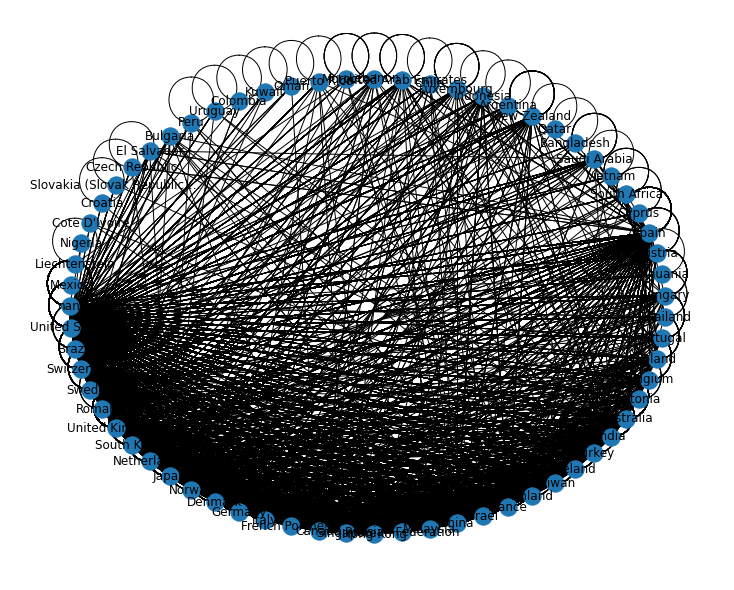

In [67]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [68]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [69]:
df2

,connections
United States,64
Japan,53
NaN,52
Germany,49
United Kingdom,48
...,...
Colombia,3
Slovakia (Slovak Republic)…,3
Nigeria,2
Liechtenstein,2
